# Цель: отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [1334]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import random 

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

sm = pd.read_csv('stud_math.csv')

In [1335]:
display(sm.head(5))
sm.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Итого у нас 17 нечисловых столбцов и 13 числовых
Также в разрезе столбцов видно, что есть много пропусков.
Проверяем названия столбцов - нужно ли переименовать что-то для удобства.

In [1336]:
cols_name = sm.columns
dict_cols_name = {}
ctr = 0
for clmn in sm.columns:
    ctr +=1
    dict_cols_name [ctr] = clmn
display (dict_cols_name)
print ("Количество полей: ", len(cols_name))

{1: 'school',
 2: 'sex',
 3: 'age',
 4: 'address',
 5: 'famsize',
 6: 'Pstatus',
 7: 'Medu',
 8: 'Fedu',
 9: 'Mjob',
 10: 'Fjob',
 11: 'reason',
 12: 'guardian',
 13: 'traveltime',
 14: 'studytime',
 15: 'failures',
 16: 'schoolsup',
 17: 'famsup',
 18: 'paid',
 19: 'activities',
 20: 'nursery',
 21: 'studytime, granular',
 22: 'higher',
 23: 'internet',
 24: 'romantic',
 25: 'famrel',
 26: 'freetime',
 27: 'goout',
 28: 'health',
 29: 'absences',
 30: 'score'}

Количество полей:  30


In [1337]:
dict_cols_name[21] = dict_cols_name[21].replace(', ', '_')
display(dict_cols_name)

{1: 'school',
 2: 'sex',
 3: 'age',
 4: 'address',
 5: 'famsize',
 6: 'Pstatus',
 7: 'Medu',
 8: 'Fedu',
 9: 'Mjob',
 10: 'Fjob',
 11: 'reason',
 12: 'guardian',
 13: 'traveltime',
 14: 'studytime',
 15: 'failures',
 16: 'schoolsup',
 17: 'famsup',
 18: 'paid',
 19: 'activities',
 20: 'nursery',
 21: 'studytime_granular',
 22: 'higher',
 23: 'internet',
 24: 'romantic',
 25: 'famrel',
 26: 'freetime',
 27: 'goout',
 28: 'health',
 29: 'absences',
 30: 'score'}

In [1338]:
cols_name = []
for val in dict_cols_name.values():
    cols_name.append(val)
print(cols_name)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


In [1339]:
sm.columns = cols_name
display(sm.head(3))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


Для обработки разных типов столбцов создадим методы их обработки:

- обработка столбцов - удаление пропусков,
                       определение уникальных записей,
                       количество признаков выше порога):

In [1340]:
def clean_null_objects(df_name,column_name, low_board):
    result = ''
    df_name[column_name] = df_name[column_name].apply(
                                lambda x: None if pd.isnull(x)
                                    else None if x == 'nan' 
                                    else x)
    display(pd.DataFrame(df_name[column_name].value_counts()))
    print("Значений, встретившихся в столбце более", low_board, "раз:", 
          (df_name[column_name].value_counts()>low_board).sum())
    return df_name.loc[:, [column_name]].info()

- Замена пустых значений:

    1. замена медианой:

In [1341]:
def null_change_median (df_name,column_name):
    cur_median = df_name[column_name].median()
    df_name[column_name] = df_name[column_name].apply(
                                lambda x: cur_median if pd.isnull(x) else x)
    return df_name.loc[:, [column_name]].info()

    2. рандомная замена в исходной пропорции:

In [1342]:
def null_change_proportion (var_list, prop_dict):
    tmp = random.choice(var_list)
    var_1 = var_list[0]
    var_2 = var_list[1]
    
    if tmp == var_1:
        if prop_dict[var_1] > 0:
            prop_dict[var_1] = prop_dict[var_1] - 1
            return var_1
        else:
            if prop_dict[var_2] > 0:
                prop_dict[var_2] = prop_dict[var_2] - 1
                return var_2
    elif tmp == var_2:
        if prop_dict[var_2] > 0:
            prop_dict[var_2] = prop_dict[var_2] - 1
            return var_2
        else:
            if prop_dict[var_1] > 0:
                prop_dict[var_1] = prop_dict[var_1] - 1
                return var_1
    else:
        return None

Замена столбца на бинарные значения:

In [1343]:
def bin_change (df_name,column_name):
    tmp_list = pd.DataFrame(df_name[column_name].value_counts()).index
    
    bin_1 = tmp_list[0]
    bin_2 = tmp_list[1]
    
    df_name[column_name] = df_name[column_name].apply(lambda x: 1 if x == bin_1 
                                                                else 0 if x == bin_2
                                                                else x)
    print ('Признак {} = 1, Признак {} = 0'.format(bin_1, bin_2))
    
    return df_name[column_name].value_counts()

Определение выбросов:

In [1344]:
def outlier_borders (df_name,column_name):
    median = df_name[column_name].median()
    IQR = df_name[column_name].quantile(0.75) - df_name[column_name].quantile(0.25)
    perc25 = df_name[column_name].quantile(0.25)
    perc75 = df_name[column_name].quantile(0.75)
    print(' 25-й перцентиль: {}\n'.format(perc25),
          '75-й перцентиль: {}\n'.format(perc75),
          "IQR: {}\n".format(IQR),
          "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Рисуем boxplot:

In [1345]:
def draw_boxplot(df_name,column_name):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column_name, y='score', 
                data=df_name.loc[df_name.loc[:, column_name]. 
                                 isin(df_name.loc[:, column_name].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column_name)
    plt.show()

Удаляем столбцы:

In [1346]:
def del_priznak(df_name,column_name):
    df_name.drop([column_name], axis = 'columns', inplace = True)
    return ('Удален столбец ' + column_name)

Тест Стьюдента:

In [1347]:
nom_list = [] #список для номинативных переменных

In [1348]:
def get_stat_dif(df, column):
    res = []
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            res = column
            break
    return res

Далее пройдем по всем полям.

# 0. поле: score

посмотрим данное поле в первую очередь, так как это наш зависимый показатель и предмет исследования.
score — баллы по госэкзамену по математике

In [1349]:
# посмотрим в целом на данные поле с оценками
pd.DataFrame(sm.score).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
score    389 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1350]:
# обработаем пустые наблюдения (null) - их 6, поэтому заменим их на медианное значение показателя
null_change_median(sm, 'score')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
score    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1351]:
# посмотрим на сам состав оценок: 
sm.score.value_counts()

50.0     54
55.0     52
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

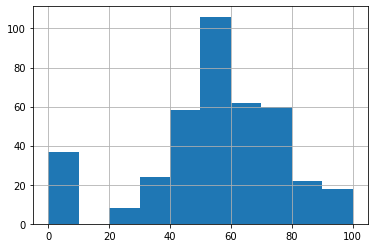

In [1352]:
sm.score.hist()
sm.score.describe()

на графике видим практически нормальное распределение, кроме 37 случаев с оценкой 0
данная оценка не очень логична, 0 - это значит, что ученик не получил ни одного балла за экзамен,
что маловероятно. Скорее всего это свидетельствует о том, что ученик не явился на экзамен

In [1353]:
# проверим, не является ли 0 выбросами, чтобы просто их убрать?
outlier_borders(sm, 'score')

 25-й перцентиль: 40.0
 75-й перцентиль: 70.0
 IQR: 30.0
 Границы выбросов: [-5.0, 115.0].


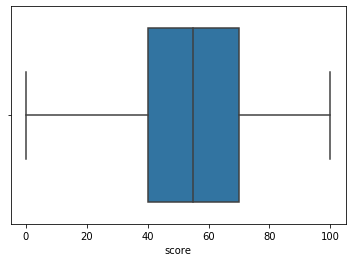

In [1354]:
sns.boxplot(sm.score)

0-е значения не являются выбросом (ни логически (такое значение теоретически может быть, ни по анализу выбросов).
Однако, для анализа предлагается считать данные значения непоказательными и рассмотреть возможность их замены или исключения из датасета.
Так как количество 0-х значений порядка 10% наблюдений (37 штук), предлагается их заменить на медианное значения показателя с добавлением отдельного поля-признака - был студент на экзамене или нет (1 - был, 0 - не был)

In [1355]:
# добавляем новое поле
sm['presence'] = sm.score.apply(lambda x: 1 if x > 0 else 0)
sm['presence'].value_counts()

1    358
0     37
Name: presence, dtype: int64

In [1356]:
# заменяем медианными 0-е значения
sm.score = sm.score.apply(lambda x: sm.score.median() if x == 0 else x)
display(sm.score.value_counts())

55.0     89
50.0     54
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

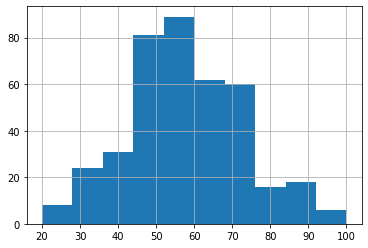

In [1357]:
sm.score.hist()

Поле подготовили для дальнейшей работы с ним6 в том числе для анализа других полей.
Нулевые значения отработаны и заменены на медианные. Также заменены на медианные значений оценок по экзамену = 0.
По данным видно, что распределение, практически имеет вид нормального, большая часть оценок от 40 до 80 баллов.

# 1. поле: school

In [1358]:
#school — аббревиатура школы, в которой учится ученик
sm.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [1359]:
print(sm.school.nunique())

2


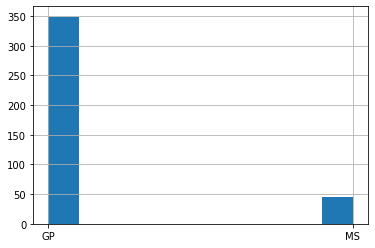

In [1360]:
sm.school.hist()

Нулевых объектов - нет, встречается всего 2 значения признака.
По распределению видно, что бОльшая часть учащихся школы GP.

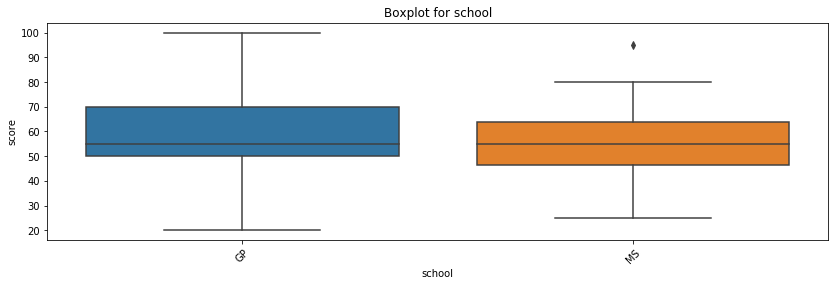

In [1361]:
# Чтобы оценить влияние на итогове оценки, посмотрим на графики
draw_boxplot(sm, 'school')

In [1362]:
# Определенная зависимость есть, для проверки влияния на оценки попробуем заменить признак на бинарные значения и проверить корреляцию
sm['school_bin'] = sm.school
bin_change(sm, 'school_bin')
sm[['school','school_bin']].head(3)

Признак GP = 1, Признак MS = 0


,school,school_bin
0,GP,1
1,GP,1
2,GP,1


In [1363]:
# проверим корреляцию признака и итоговых оценок
sm[['school_bin', 'score']].corr()

,school_bin,score
school_bin,1.000000,0.073765
score,0.073765,1.000000


Корреляция небольшая коррекляция с итоговыми оценками. Примем решение по использованию данного признака позже, после окончания анализа всех полей.

In [1364]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('school')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list = ['school_bin']

# 2. поле: sex

In [1365]:
# sex — пол ученика ('F' - женский, 'M' - мужской)
sm.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [1366]:
print(sm.sex.nunique())

2


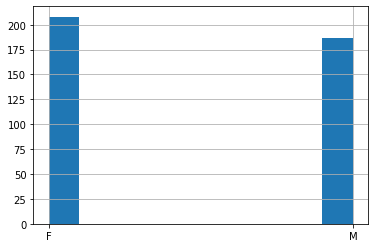

In [1367]:
sm.sex.hist()

Нулевых объектов - нет, встречается 2 значения признака. 
Мужчины и женщины распределены практически поровну.

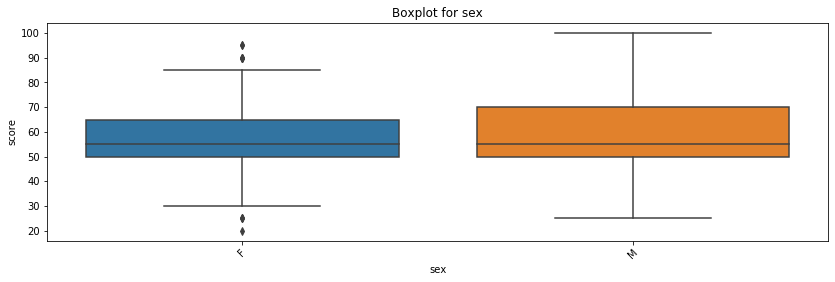

In [1368]:
# Чтобы оценить влияние на итогове оценки, посмотрим на графики
draw_boxplot(sm, 'sex')

In [1369]:
# для проверки влияния на оценки попробуем заменить признак на бинарные значения и проверить корреляцию
sm['sex_bin'] = sm.sex
bin_change(sm, 'sex_bin')
sm[['sex','sex_bin']].head(3)

Признак F = 1, Признак M = 0


,sex,sex_bin
0,F,1
1,F,1
2,F,1


In [1370]:
# проверим корреляцию признака и итоговых оценок
sm[['sex_bin', 'score']].corr()

,sex_bin,score
sex_bin,1.000000,-0.099707
score,-0.099707,1.000000


Корреляция с итоговыми оценками достаточно низкая. Примем решение по использованию данного признака позже, после окончания анализа всех полей.

In [1371]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('sex')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('sex_bin')

# 3. поле: age

In [1372]:
# age — возраст ученика (от 15 до 22)
pd.DataFrame(sm.age).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    395 non-null int64
dtypes: int64(1)
memory usage: 3.2 KB


In [1373]:
sm.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

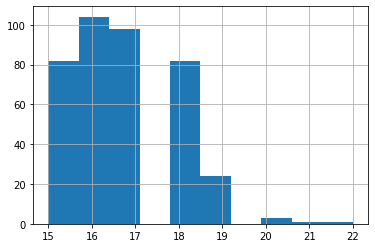

In [1374]:
sm.age.hist()
sm.age.describe()

Пустых значений - нет, выбросов - нет (наблюдения распределены в заданных границах 15 - 22 года). 
БОльшая часть наблюдений лежит в области 15-17 лет.

In [1375]:
# проверим корреляцию признака и итоговых оценок
sm[['age', 'score']].corr()

,age,score
age,1.000000,-0.129911
score,-0.129911,1.000000


Корреляция с итоговыми оценками также достаточно низкая. Примем решение по использованию данного признака позже, после окончания анализа всех полей.

# 4. address

In [1376]:
# address — тип адреса ученика ('U' - городской, 'R' - за городом)
pd.DataFrame(sm.age).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    395 non-null int64
dtypes: int64(1)
memory usage: 3.2 KB


In [1377]:
sm.address.value_counts()

U    295
R     83
Name: address, dtype: int64

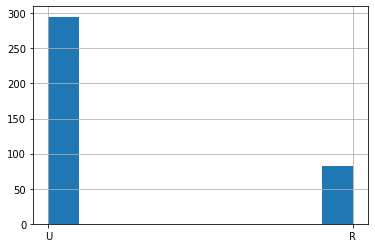

In [1378]:
sm.address.hist()

Нулевых объектов - нет, встречается 2 значения признака. 
Наблюдений, в которых стоит признак отнесения адреса к городскому значительно превышает адреса с признаком "за городом".

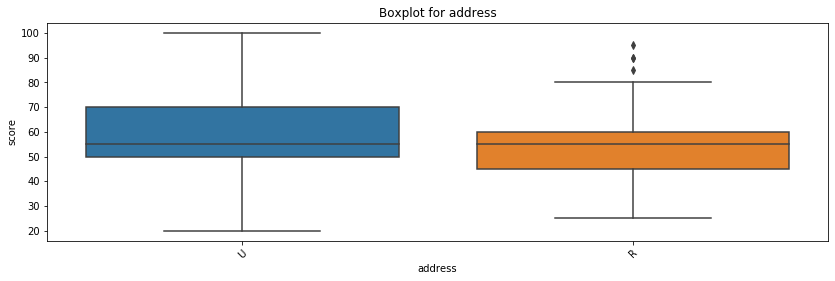

In [1379]:
# Чтобы оценить влияние на итогове оценки, посмотрим на графики
draw_boxplot(sm, 'address')

In [1380]:
# для проверки влияния на оценки попробуем заменить признак на бинарные значения и проверить корреляцию
sm['address_bin'] = sm.address
bin_change(sm, 'address_bin')
sm[['address','address_bin']].head(3)

Признак U = 1, Признак R = 0


,address,address_bin
0,U,1.0
1,U,1.0
2,U,1.0


In [1381]:
# проверим корреляцию признака и итоговых оценок
sm[['address_bin', 'score']].corr()

,address_bin,score
address_bin,1.000000,0.131088
score,0.131088,1.000000


Небольшая корреляция с итоговыми оценками есть. Примем решение по использованию данного признака позже, после окончания анализа всех полей. 

In [1382]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('address')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('address_bin')

# 5. поле: famsize

In [1383]:
# famsize — размер семьи('LE3' <= 3, 'GT3' >3)
pd.DataFrame(sm.famsize).info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsize    368 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1384]:
sm.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

In [1385]:
sm.famsize.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

In [1386]:
# очищаем нулевые значения
clean_null_objects(sm, 'famsize', 100)

,famsize
GT3,261
LE3,107


Значений, встретившихся в столбце более 100 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsize    368 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1387]:
# мы видим, что часть данных (27 значений, примерно 7%) - пропущена. 
# пропусков немного, поэтому выделять в отдельную категорию нет смысла

# в датасете есть информация об образовании родителей и их работе - можно
# предположить, что если есть данные об образовании и/или о работе родителей, то
# родителей двое, но это не проливает свет на отнесение к нужной категории, 
# так как нет сведений о других членах семьи

# так как у нас всего 2 категории, предлагается замена пропусков рандомно с учетом текущей пропорции категорий
var_list = ['GT3', 'LE3']
quant_nulls = 27
prop_gt3 = 261/395
prop_dict = {
    'GT3': int(round(quant_nulls * prop_gt3,0)),
    'LE3': int(quant_nulls - int(round(quant_nulls * prop_gt3,0)))
}

sm.famsize = sm.famsize.apply(lambda x: null_change_proportion(var_list, prop_dict) if pd.isnull(x) else x)

In [1388]:
pd.DataFrame(sm.famsize).info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsize    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1389]:
sm.famsize.value_counts()

GT3    279
LE3    116
Name: famsize, dtype: int64

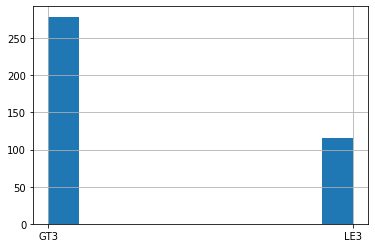

In [1390]:
sm.famsize.hist()

В итоге уникальных значения признака - 2. Пустые значения очищены и заменены на рандомные значения пропорциоанльно исходному распределению ненулевых признаков.
Значительно бОльшее количество наблюдений имеют показывают, что в среди студентов преобладают семьи более 3 человек.

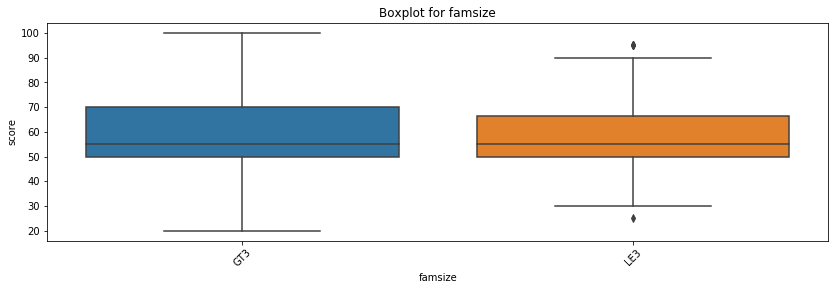

In [1391]:
# Чтобы оценить влияние на итогове оценки, посмотрим на графики
draw_boxplot(sm, 'famsize')

In [1392]:
# для проверки влияния на оценки попробуем заменить признак на бинарные значения и проверить корреляцию
sm['famsize_bin'] = sm.famsize
bin_change(sm, 'famsize_bin')
sm[['famsize','famsize_bin']].head(3)

Признак GT3 = 1, Признак LE3 = 0


,famsize,famsize_bin
0,GT3,1
1,GT3,1
2,LE3,0


In [1393]:
# проверим корреляцию признака и итоговых оценок
sm[['famsize_bin', 'score']].corr()

,famsize_bin,score
famsize_bin,1.000000,-0.029123
score,-0.029123,1.000000


Есть небольшая коррекляция. Примем решение по использованию данного признака позже, после окончания анализа всех полей. 

In [1394]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('famsize')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('famsize_bin')

# 6. поле: Pstatus

In [1395]:
# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
pd.DataFrame(sm.Pstatus).info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    350 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1396]:
sm.Pstatus.value_counts()

T    314
A     36
Name: Pstatus, dtype: int64

In [1397]:
sm.Pstatus.unique()

array(['A', nan, 'T'], dtype=object)

In [1398]:
# очищаем нулевые значения
clean_null_objects(sm, 'Pstatus', 20)

,Pstatus
T,314
A,36


Значений, встретившихся в столбце более 20 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    350 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1399]:
# для того, чтобы не было ошибки в использования признака, 
# а также, чтобы потом проще было использовать данные в модели,
# заменим текущие данные на бинарный признак: T (живут вместе) = 1, А (живут раздельно) = 0

sm.Pstatus = sm.Pstatus.apply(lambda x: None if pd.isnull(x)
                                          else 0 if x == 'A' # англ раскладка
                                          else 0 if x == 'А' # рус раскладка
                                          else 1 if x == 'T' # англ раскладка
                                          else 1 if x == 'Т' # рус раскладка
                                          else x)
sm.Pstatus.value_counts()

1.0    314
0.0     36
Name: Pstatus, dtype: int64

In [1400]:
# достаточно много значений прорущено 45 (это порядка 11%) и 
# найти влияние на этот признак других признаков не удается. 
# Поэтому будем заменять значения также рандомно с соблюдением пропорции изначального распределения.
var_list = [1, 0]
quant_nulls = 45
prop_gt3 = 314/395
prop_dict = {
    1: int(round(quant_nulls * prop_gt3,0)),
    0: int(quant_nulls - int(round(quant_nulls * prop_gt3,0)))
}

sm.Pstatus = sm.Pstatus.apply(lambda x: null_change_proportion(var_list, prop_dict) if pd.isnull(x) else x)
sm.Pstatus.value_counts()

1.0    350
0.0     45
Name: Pstatus, dtype: int64

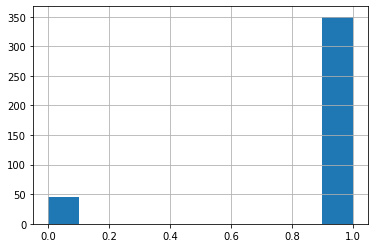

In [1401]:
sm.Pstatus.hist()

Уникальных значений признака - 2. Пустые значения очищены и заменены рандомно с учетом исходного распределения,
Так как количество пропусков порядка 11% - немаленькое и замена, например, наиболее распространенным значением, может сильно исказить картину.
Значительное количество наблюдений имеют признак того, что семьи проживают совметно.

In [1402]:
# проверим корреляцию признака и итоговых оценок
sm[['Pstatus', 'score']].corr()

,Pstatus,score
Pstatus,1.000000,-0.028387
score,-0.028387,1.000000


Есть небольшая коррекляция. Примем решение по использованию данного признака позже, после окончания анализа всех полей. 

# 7. поле: Medu

In [1403]:
# Medu — образование матери (
# 0 - нет, 
# 1 - 4 класса,
# 2 - 5-9 классы, 
# 3 - среднее специальное или 11 классов, 
# 4 - высшее)
pd.DataFrame(sm.Medu).info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    392 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1404]:
sm.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [1405]:
sm.Medu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

In [1406]:
# очищаем нулевые значения
clean_null_objects(sm, 'Medu', 1)

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 1 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    392 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


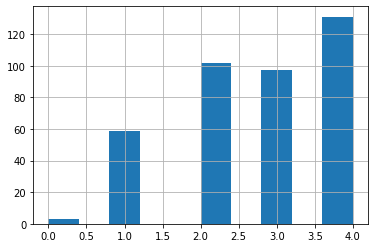

In [1407]:
sm.Medu.hist()

In [1408]:
# так как количество пропусков данных всего 3 (менее 1%), заменим их на самый распространенный признак (=4)
sm.Medu = sm.Medu.apply(lambda x: 4 if pd.isnull(x) else x)
sm.Medu.value_counts()

4.0    134
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [1409]:
pd.DataFrame(sm.Medu).info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


Уникальных значений признака - 5. Пустые значения очищены, 3 нулевых значения заменены наиболее распространенным значением.
Большая чась наблюдений с признаками в промежутке 2-4, что свидетельствует о том, что в основном у всех матерей учеников образование не менее 9 классов.

In [1410]:
# проверим корреляцию признака и итоговых оценок
sm[['Medu', 'score']].corr()

,Medu,score
Medu,1.000000,0.175363
score,0.175363,1.000000


Есть небольшая коррекляция. Примем решение по использованию данного признака позже, после окончания анализа всех полей. 

# 8. поле: Fedu

In [1411]:
# Fedu — образование отца (
# 0 - нет, 
# 1 - 4 класса, 
# 2 - 5-9 классы, 
# 3 - среднее специальное или 11 классов, 
# 4 - высшее)
pd.DataFrame(sm.Fedu).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    371 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1412]:
sm.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [1413]:
# очищаем нулевые значения
clean_null_objects(sm, 'Fedu', 10)

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    371 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


Среди наблюдений есть 1 значение явно ошибочное, так как по описанию поля значения должны находиться в диапазоне от 0 до 4. 
Так как признак Fedu является нечисловым, данное ошибочное наблюдение просто исключим

In [1414]:
sm.Fedu = sm.Fedu.apply(lambda x: None if x > 4 else x)

In [1415]:
display(pd.DataFrame(sm.Fedu.value_counts()))
pd.DataFrame(sm.Fedu).info()

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    370 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1416]:
# количество нулевых значений 25 (почти 13%). Так как распределение более-менее равномерное,
# заполним пропуски с помощью медианного значения
sm.Fedu = sm.Fedu.apply(lambda x: sm.Fedu.median() if pd.isnull(x) else x)
display(sm.Fedu.value_counts())
pd.DataFrame(sm.Fedu).info() 

2.0    131
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


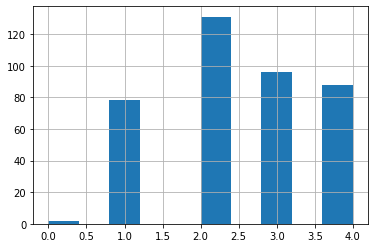

In [1417]:
sm.Fedu.hist()

Уникальных значений, после удаления одного ошибочного значения, - 5, 
при этом уникальных значений, по которым количество наблюдений свыше десяти - 4.
Пустые значения очищены, заполнены медианным значением. 
1 значение, противоречащее здравому смыслу (=40) также было очищено и заменено медианой.
Так как 2 показателя Medu и Fedu связаны, проверим необходимость их одновременного использования

In [1418]:
# проверим корреляцию обоих признаков и оценок итоговых
sm[['Fedu','Medu', 'score']].corr()

,Fedu,Medu,score
Fedu,1.000000,0.591836,0.121710
Medu,0.591836,1.000000,0.175363
score,0.121710,0.175363,1.000000


In [1419]:
# оба показателя довольно связаны друг с другом, но на оценки влияют слабо
# попробуем сделать 1 признак, объединяющий данные по родителям (1 - есть образование, 0 - нет)
sm['Parents_edu'] = sm.Fedu.apply(lambda x: 0 if pd.isnull(x) or x <= 2 
                                      else 1) + sm.Medu.apply(lambda x: 0 if pd.isnull(x) or x <= 2 
                                                                  else 1)

In [1420]:
sm['Parents_edu'].value_counts()

2    155
0    135
1    105
Name: Parents_edu, dtype: int64

In [1421]:
# проверим корреляцию признаков, включая новый, и оценок итоговых
sm[['Fedu','Medu', 'Parents_edu', 'score']].corr()

,Fedu,Medu,Parents_edu,score
Fedu,1.000000,0.591836,0.817520,0.121710
Medu,0.591836,1.000000,0.813620,0.175363
Parents_edu,0.817520,0.813620,1.000000,0.126914
score,0.121710,0.175363,0.126914,1.000000


В итоге связь с результирующим показателем дост аточно низкая, как отдельно по признакам Fedu и Medu, так и новый признак, объединяющий оба показателя. Примем решение по использованию показателей позже.

# 9. поле: Mjob

In [1422]:
# Mjob — работа матери (
#    'teacher' - учитель, 
#    'health' - сфера здравоохранения, 
#    'services' - гос служба, 
#    'at_home' - не работает, 
#    'other' - другое)
pd.DataFrame(sm.Mjob).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    376 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1423]:
sm.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [1424]:
sm.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [1425]:
# очищаем нулевые значения
clean_null_objects(sm, 'Mjob', 10)

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    376 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1426]:
# у нас остается достаточно много нулевых значений - 19 (около 5%)
# заменим нулевые значение наиболее распространенным ответом, 
# так как это значение other, то логично, что не названные работы могут попасть в этот класс,
# возможно, что работу не называют в связи с ее неофициальным статусом
sm.Mjob = sm.Mjob.apply(lambda x: 'other' if pd.isnull(x) else x)
pd.DataFrame(sm.Mjob).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1427]:
sm.Mjob.value_counts()

other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

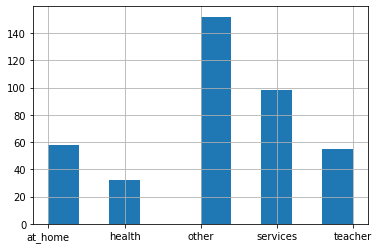

In [1428]:
sm.Mjob.hist()

У нас получилось 5 уникальных значения (все они выше 10 наблюдений). 
Пустые значения обработаны и заменены наиболее распространенным значением.
По типам работ есть 2 явных лидера - это категория другое и сфера услуг. Интересно, что преподавателями работает столько же, сколько и сидит дома (практически равные значения).

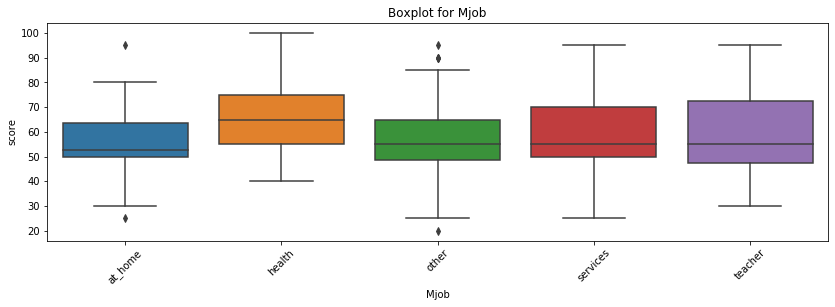

In [1429]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'Mjob')

По графику видно, что определенное влияние на итоговые оценки показатель может оказывать. Проверку наличия статистической разницы в распределении оценок проведем позже, сразу по всем номинативным признакам.

In [1430]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('Mjob')

# 10. Fjob

In [1431]:
#Fjob — работа отца (
#    'teacher' - учитель, 
#    'health' - сфера здравоохранения, 
#    'services' - гос служба, 
#    'at_home' - не работает, 
#    'other' - другое)
pd.DataFrame(sm.Fjob).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    359 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1432]:
sm.Fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [1433]:
sm.Fjob.unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [1434]:
# очищаем нулевые значения
clean_null_objects(sm, 'Fjob', 10)

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    359 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1435]:
# у нас остается достаточно много нулевых значений - 46 (около 12%)
# заменим нулевые значение также наиболее распространенным ответом
sm.Fjob = sm.Fjob.apply(lambda x: 'other' if pd.isnull(x) else x)
pd.DataFrame(sm.Fjob).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1436]:
sm.Fjob.value_counts()

other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

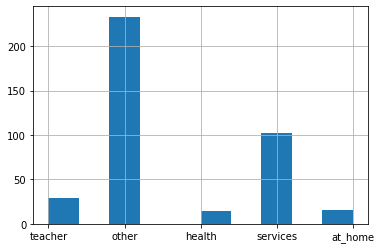

In [1437]:
sm.Fjob.hist()

Уникальных значений - 5, в том числе, если считать свыше порога в 10 наблюдений.
Нулевые значения обработаны и заменены на наиболее распространенный ответ.
Среди наблюдений значительно выбивается количество специальностей в категории прочее, также, как и у матерей, достаточно выбивается спецтальности категории сферы услуг. Зато количество находящихся дома - один из самых маленьких, меньше, чем у мам.

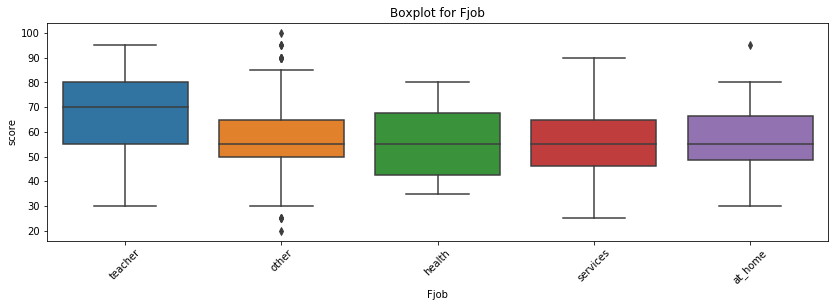

In [1438]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'Fjob')

По графику видно, что определенное влияние на итоговые оценки показатель может оказывать. Проверку наличия статистической разницы в распределении оценок проведем позже, сразу по всем номинативным признакам.

In [1439]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('Fjob')

# 11. поле: reason

In [1440]:
# reason — причина выбора школы (
#    'home' - близость к дому, 
#    'reputation' - репутация школы, 
#    'course' - образовательная программа, 
#    'other' - другое)
pd.DataFrame(sm.reason).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1441]:
sm.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

In [1442]:
sm.reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [1443]:
# очищаем нулевые значения
clean_null_objects(sm, 'reason', 30)

,reason
course,137
home,104
reputation,103
other,34


Значений, встретившихся в столбце более 30 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


Порядка 6% (17) значений остаются нулевыми, предлагается их также заменить на наиболее частовстречающееся значение 

In [1444]:
sm.reason = sm.reason.apply(lambda x: 'course' if pd.isnull(x) else x)
pd.DataFrame(sm.reason).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1445]:
sm.reason.value_counts()

course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64

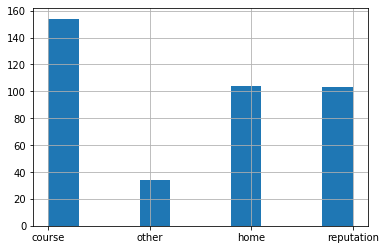

In [1446]:
sm.reason.hist()

Уникальных значений - 4, в том числе, если считать свыше порога в 30 наблюдений.
Нулевые значения заменены самым частым значением.
Среди наблюдений незначительно выбивается количество выбора курсов по причине образовательной программы. Близость к дому и репутация также занимает существенную часть и практически поровну распределены.

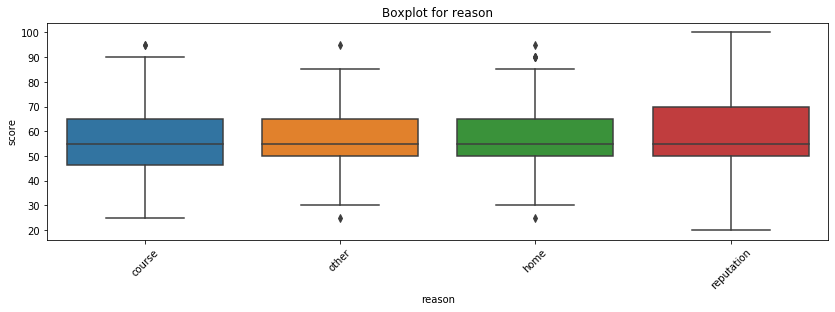

In [1447]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'reason')

По графику видно, что совсем небольшое влияние на итоговые оценки показатель может оказывать. Проверку наличия статистической разницы в распределении оценок проведем позже, сразу по всем номинативным признакам.

In [1448]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('reason')

# 12. поле: guardian

In [1449]:
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
pd.DataFrame(sm.guardian).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1450]:
sm.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

In [1451]:
sm.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [1452]:
# очищаем нулевые значения
clean_null_objects(sm, 'guardian', 20)

,guardian
mother,250
father,86
other,28


Значений, встретившихся в столбце более 20 раз: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1453]:
# Нулевых значений 31 (почти 8%). 
# Так как в большей части наблюдений преобладает один явный вариант, им заменим нулевые значения 
sm.guardian = sm.guardian.apply(lambda x: 'mother' if pd.isnull(x) else x)
pd.DataFrame(sm.guardian).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1454]:
sm.guardian.value_counts()

mother    281
father     86
other      28
Name: guardian, dtype: int64

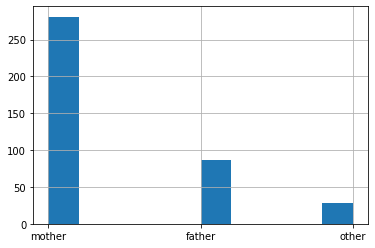

In [1455]:
sm.guardian.hist()

3 уникальных значения, в том числе с порогом свыше 20 наблюдений. Подавляюещее количество опекунов представлены матерями.
Нулевые значения заполнены самым частым значением.

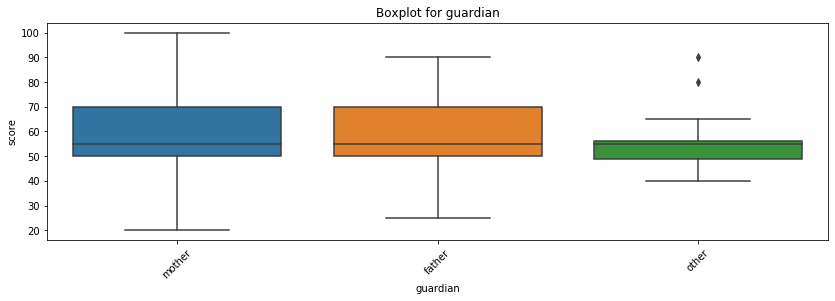

In [1456]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'guardian')

По графику видно, что влияние на итоговые оценки скорее вего минимальное. Проверку наличия статистической разницы в распределении оценок проведем позже, сразу по всем номинативным признакам.

In [1457]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('guardian')

# 13. поле: traveltime

In [1458]:
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
pd.DataFrame(sm.traveltime).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    367 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1459]:
sm.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [1460]:
sm.traveltime.unique()

array([ 2.,  1.,  3., nan,  4.])

In [1461]:
# очищаем нулевые значения
clean_null_objects(sm, 'traveltime', 10)

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    367 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1462]:
# Порядка 7% (28) - это нулевые значения. 
# Так как по распределению явное большинство это вариант №1, 
# предлагается нулевые значения заменить на наиболее частый вариант - на 1
sm.traveltime = sm.traveltime.apply(lambda x: 1 if pd.isnull(x) else x)
pd.DataFrame(sm.traveltime).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1463]:
sm.traveltime.value_counts()

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

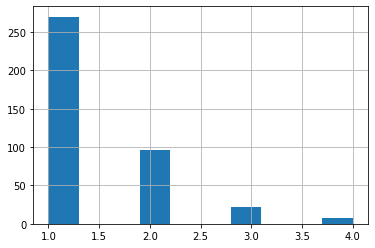

In [1464]:
sm.traveltime.hist()

4 уникальных значения. Количество уникальных значений с порогом свыше 10 наблюдений - 3. Подавляюещее количество школьников находится в пределах 30 минут до школы.
Нулевые значения заполнены самым частым значением.

In [1465]:
# проверим корреляцию признака и итоговых оценок
sm[['traveltime', 'score']].corr()

,traveltime,score
traveltime,1.0000,-0.0697
score,-0.0697,1.0000


Мы видим, что корреляция достаточно низкая. Примем решение по использованию данного поля - позже.

# 14. поле: studytime

In [1466]:
# studytime — время на учёбу помимо школы в неделю (
#    1 - <2 часов, 
#    2 - 2-5 часов, 
#    3 - 5-10 часов, 
#    4 - >10 часов)
pd.DataFrame(sm.studytime).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1467]:
sm.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [1468]:
sm.studytime.unique()

array([ 2.,  3.,  1., nan,  4.])

In [1469]:
# очищаем нулевые значения
clean_null_objects(sm, 'studytime', 10)

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1470]:
# пропусков не очень много по показателю (7, это менее 2%). Заменим их на медианное значение
sm.studytime = sm.studytime.apply(lambda x: sm.studytime.median() if pd.isnull(x) else x)
pd.DataFrame(sm.studytime).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1471]:
sm.studytime.value_counts()

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

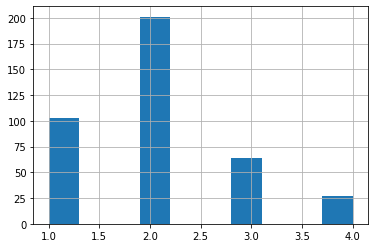

In [1472]:
sm.studytime.hist()
sm.studytime.describe()

4 уникальных значения. Количество уникальных значений с порогом свыше 10 наблюдений - 4.
Основная часть студентов учится дополнительно от 2 до 5 часов в неделю.
Также много студентов, тратящих на доп обучение менее 2 часов в неделю

In [1473]:
# проверим корреляцию признака и итоговых оценок
sm[['studytime', 'score']].corr()

,studytime,score
studytime,1.000000,0.132675
score,0.132675,1.000000


Данные по коррекляции показывают, что несмотря на логичное предлположение, что доп. занятия должны повлиять на тоговую оценку непосредсттвенно, по факту, корреляция достаточно низкая. Примем решение по использованию данного признака - позже.

# 15. поле: failures

In [1474]:
# failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
pd.DataFrame(sm.failures).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    373 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1475]:
sm.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [1476]:
sm.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [1477]:
# очищаем пустые значения
clean_null_objects(sm, 'failures', 10)

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    373 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


По распределению мы видим, что подавляющее большинство значений - это ноль, хотя по описанию показателя: n, если 1<=n<3, иначе 4. В данном случае 0 можно было бы принять за признак того, что внеучебных неудач не было, но учитывая описание столбца, будем считать 0 - ошибкой и так как он не попадает в 1<=n<3, заменим 0 на 4

In [1478]:
sm.failures = sm.failures.apply(lambda x: None if pd.isnull(x) 
                                          else 4 if x == 0
                                          else x)
sm.failures.value_counts()

4.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [1479]:
# пропусков не так и много по показателю (22, это около 6%). Заменим их на медианное значение
sm.failures = sm.failures.apply(lambda x: sm.failures.median() if pd.isnull(x) else x)
pd.DataFrame(sm.failures).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1480]:
sm.failures.value_counts()

4.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

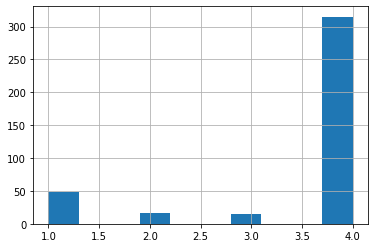

In [1481]:
sm.failures.hist()

4 уникальных значения (в том числе с количеством наблюдений свыше 10).
Мы не знаем значения, что означает оценка 4, но это подавляющее большинство наблюдений. Давайте посмотрим коррекляцию.

In [1482]:
# проверим корреляцию признака и итоговых оценок
sm[['failures', 'score']].corr()

,failures,score
failures,1.000000,0.217299
score,0.217299,1.000000


Корреляция приближается к порогу в 0,3, что уже неплохо. Примем решение по использованию данного поля - позже.

# 16. поле: schoolsup

In [1483]:
# schoolsup — дополнительная образовательная поддержка (yes или no)
pd.DataFrame(sm.schoolsup).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    386 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1484]:
sm.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

In [1485]:
sm.schoolsup.unique()

array(['yes', 'no', nan], dtype=object)

In [1486]:
# очищаем пустые значения
clean_null_objects(sm, 'schoolsup', 10)

,schoolsup
no,335
yes,51


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    386 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1487]:
# пропусков немного - 9 (порядка 2%)
# так как у нас всего 2 категории, предлагается замена пропусков рандомно с учетом текущей пропорции категорий
var_list = ['yes', 'no']
quant_nulls = 9
prop_yes = 335/395
prop_dict = {
    'yes': int(round(quant_nulls * prop_yes,0)),
    'no': int(quant_nulls - int(round(quant_nulls * prop_yes,0)))
}

sm.schoolsup = sm.schoolsup.apply(lambda x: null_change_proportion(var_list, prop_dict) if pd.isnull(x) else x)

In [1488]:
pd.DataFrame(sm.schoolsup).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1489]:
sm.schoolsup.value_counts()

no     336
yes     59
Name: schoolsup, dtype: int64

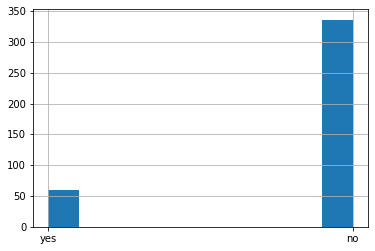

In [1490]:
sm.schoolsup.hist()

2 уникальных значения, нулевые значения были заменены рандомно с соблюдением исходной пропорции
Количество наблюдений с отсутствием образовательной поддержки, практически в 5,5 раза больше
Для проверки влияния признака на итоговые оценки, нужно проверить корреляцию - для этого переведем значения к бинарным 1 и 0

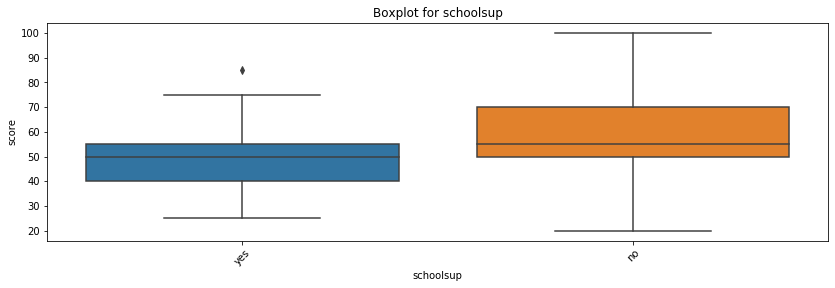

In [1491]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'schoolsup')

In [1492]:
# попробуем проверить корреляцию, для этого перейдем к бинарной оценке признака
sm['schoolsup_bin'] = sm.schoolsup
bin_change(sm, 'schoolsup_bin')
sm[['schoolsup','schoolsup_bin']].head(3)

Признак no = 1, Признак yes = 0


,schoolsup,schoolsup_bin
0,yes,0
1,no,1
2,yes,0


In [1493]:
# проверим корреляцию признака и итоговых оценок
sm[['schoolsup_bin', 'score']].corr()

,schoolsup_bin,score
schoolsup_bin,1.000000,0.236754
score,0.236754,1.000000


Корреляция есть, хоть и не очень высокая. Примем решение по данному признаку позже.

In [1494]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('schoolsup')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('schoolsup_bin')

# 17. поле: famsup

In [1495]:
# famsup — семейная образовательная поддержка (yes или no)
pd.DataFrame(sm.famsup).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsup    356 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1496]:
sm.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

In [1497]:
sm.famsup.unique()

array(['no', 'yes', nan], dtype=object)

In [1498]:
# очистим нулевые значения
clean_null_objects(sm, 'famsup', 10)

,famsup
yes,219
no,137


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsup    356 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1499]:
# пропусков достаточно много - 39 (порядка 10%)
# так как у нас всего 2 категории, предлагается замена пропусков рандомно с учетом текущей пропорции категорий
var_list = ['yes', 'no']
quant_nulls = 39
prop_yes = 219/395
prop_dict = {
    'yes': int(round(quant_nulls * prop_yes,0)),
    'no': int(quant_nulls - int(round(quant_nulls * prop_yes,0)))
}

sm.famsup = sm.famsup.apply(lambda x: null_change_proportion(var_list, prop_dict) if pd.isnull(x) else x)

In [1500]:
pd.DataFrame(sm.famsup).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsup    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1501]:
sm.famsup.value_counts()

yes    241
no     154
Name: famsup, dtype: int64

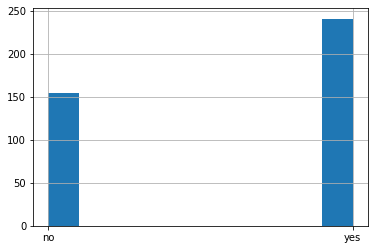

In [1502]:
sm.famsup.hist()

2 уникальных значения, нулевые значения были заменены рандомно с соблюдением исходной пропорции
Количество наблюдений с наличием семейной поддержки, практически в 1,5 раза больше
Для проверки влияния признака на итоговые оценки, нужно проверить корреляцию - для этого переведем значения к бинарным 1 и 0

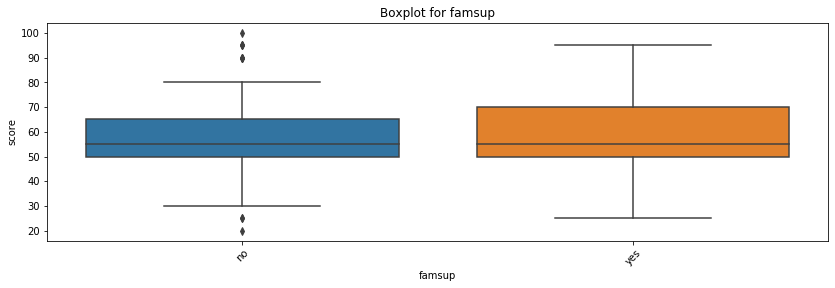

In [1503]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'famsup')

In [1504]:
# попробуем проверить корреляцию, для этого перейдем к бинарной оценке признака
sm['famsup_bin'] = sm.famsup
bin_change(sm, 'famsup_bin')
sm[['famsup','famsup_bin']].head(3)

Признак yes = 1, Признак no = 0


,famsup,famsup_bin
0,no,0
1,yes,1
2,no,0


In [1505]:
# проверим корреляцию признака и итоговых оценок
sm[['famsup_bin', 'score']].corr()

,famsup_bin,score
famsup_bin,1.000000,-0.032857
score,-0.032857,1.000000


Достаточно низкое значение корреляции. Примем решение по данному признаку позже.

In [1506]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('famsup')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('famsup_bin')

# 18. поле: paid

In [1507]:
# paid — дополнительные платные занятия по математике (yes или no)
pd.DataFrame(sm.paid).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
paid    355 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1508]:
sm.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

In [1509]:
sm.paid.unique()

array(['no', nan, 'yes'], dtype=object)

In [1510]:
# очистим нулевые значения
clean_null_objects(sm, 'paid', 10)

,paid
no,200
yes,155


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
paid    355 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1511]:
# пропусков достаточно много - 40 (порядка 10%)
# так как у нас всего 2 категории, предлагается замена пропусков рандомно с учетом текущей пропорции категорий
var_list = ['yes', 'no']
quant_nulls = 40
prop_yes = 200/395
prop_dict = {
    'yes': int(round(quant_nulls * prop_yes,0)),
    'no': int(quant_nulls - int(round(quant_nulls * prop_yes,0)))
}

sm.paid = sm.paid.apply(lambda x: null_change_proportion(var_list, prop_dict) if pd.isnull(x) else x)
pd.DataFrame(sm.paid).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
paid    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1512]:
sm.paid.value_counts()

no     220
yes    175
Name: paid, dtype: int64

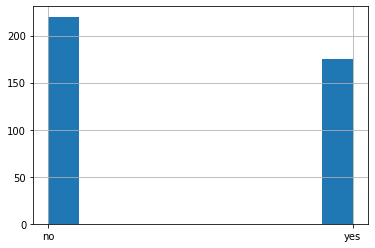

In [1513]:
sm.paid.hist()

2 уникальных значения, нулевые значения были заменены рандомно с соблюдением исходной пропорции
Количество наблюдений примерно поровну распределены
Для проверки влияния признака на итоговые оценки, нужно проверить корреляцию - для этого переведем значения к бинарным 1 и 0

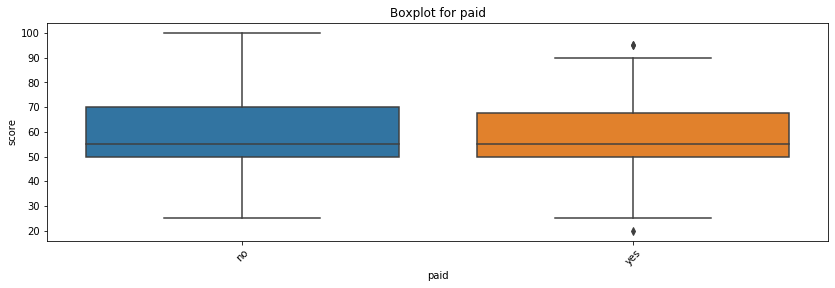

In [1514]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'paid')

In [1515]:
# попробуем проверить корреляцию, для этого перейдем к бинарной оценке признака
sm['paid_bin'] = sm.paid
bin_change(sm, 'paid_bin')
sm[['paid','paid_bin']].head(3)

Признак no = 1, Признак yes = 0


,paid,paid_bin
0,no,1
1,no,1
2,yes,0


In [1516]:
# проверим корреляцию признака и итоговых оценок
sm[['paid_bin', 'score']].corr()

,paid_bin,score
paid_bin,1.000000,0.029903
score,0.029903,1.000000


Корреляция - низкая. Решение по ипользованию признака будем принимать позже.

In [1517]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('paid')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('paid_bin')

# 19. поле: activities

In [1518]:
# activities — дополнительные внеучебные занятия (yes или no)
pd.DataFrame(sm.activities).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
activities    381 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1519]:
sm.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

In [1520]:
sm.activities.unique()

array(['no', 'yes', nan], dtype=object)

In [1521]:
# очистим нулевые значения
clean_null_objects(sm, 'activities', 10)

,activities
yes,195
no,186


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
activities    381 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1522]:
# пропусков не очень много - 14 (порядка 4%)
# так как у нас всего 2 категории, предлагается замена пропусков рандомно с учетом текущей пропорции категорий
var_list = ['yes', 'no']
quant_nulls = 14
prop_yes = 195/395
prop_dict = {
    'yes': int(round(quant_nulls * prop_yes,0)),
    'no': int(quant_nulls - int(round(quant_nulls * prop_yes,0)))
}

sm.activities = sm.activities.apply(lambda x: null_change_proportion(var_list, prop_dict) if pd.isnull(x) else x)
pd.DataFrame(sm.famsup).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsup    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1523]:
sm.activities.value_counts()

yes    202
no     193
Name: activities, dtype: int64

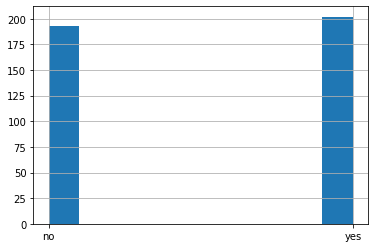

In [1524]:
sm.activities.hist()

2 уникальных значения, нулевые значения были заменены рандомно с соблюдением исходной пропорции
Количество наблюдений примерно поровну распределены
Для проверки влияния признака на итоговые оценки, нужно проверить корреляцию - для этого переведем значения к бинарным 1 и 0

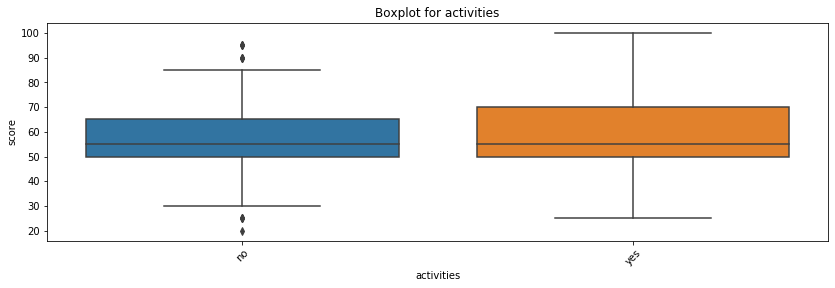

In [1525]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'activities')

In [1526]:
# попробуем проверить корреляцию, для этого перейдем к бинарной оценке признака
sm['activities_bin'] = sm.activities
bin_change(sm, 'activities_bin')
sm[['activities','activities_bin']].head(3)

Признак yes = 1, Признак no = 0


,activities,activities_bin
0,no,0
1,no,0
2,no,0


In [1527]:
# проверим корреляцию признака и итоговых оценок
sm[['activities_bin', 'score']].corr()

,activities_bin,score
activities_bin,1.00000,0.05594
score,0.05594,1.00000


Корреляция - низкая. Решение по ипользованию признака будем принимать позже.

In [1528]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('activities')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('activities_bin')

# 20. поле: nursery

In [1529]:
# nursery — посещал детский сад (yes или no)
pd.DataFrame(sm.nursery).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
nursery    379 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1530]:
sm.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

In [1531]:
sm.nursery.unique()

array(['yes', 'no', nan], dtype=object)

In [1532]:
# очистим нулевые значения
clean_null_objects(sm, 'nursery', 10)

,nursery
yes,300
no,79


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
nursery    379 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1533]:
# пропусков немного - 16 (порядка 4%)
# так как у нас всего 2 категории, предлагается замена пропусков рандомно с учетом текущей пропорции категорий
var_list = ['yes', 'no']
quant_nulls = 16
prop_yes = 300/395
prop_dict = {
    'yes': int(round(quant_nulls * prop_yes,0)),
    'no': int(quant_nulls - int(round(quant_nulls * prop_yes,0)))
}

sm.nursery = sm.nursery.apply(lambda x: null_change_proportion(var_list, prop_dict) if pd.isnull(x) else x)
pd.DataFrame(sm.nursery).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
nursery    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1534]:
sm.nursery.value_counts()

yes    312
no      83
Name: nursery, dtype: int64

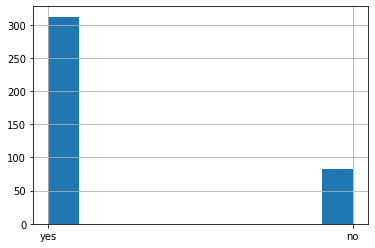

In [1535]:
sm.nursery.hist()

2 уникальных значения, нулевые значения были заменены рандомно с соблюдением исходной пропорции
Явно преобладает количестов наблюдений о том, что студенты посещали детский сад
Для проверки влияния признака на итоговые оценки, нужно проверить корреляцию - для этого переведем значения к бинарным 1 и 0

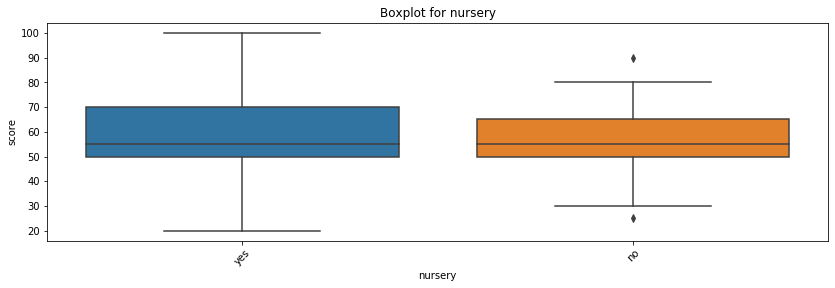

In [1536]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'nursery')

In [1537]:
# попробуем проверить корреляцию, для этого перейдем к бинарной оценке признака
sm['nursery_bin'] = sm.nursery
bin_change(sm, 'nursery_bin')
sm[['nursery','nursery_bin']].head(3)

Признак yes = 1, Признак no = 0


,nursery,nursery_bin
0,yes,1
1,no,0
2,yes,1


In [1538]:
# проверим корреляцию признака и итоговых оценок
sm[['nursery_bin', 'score']].corr()

,nursery_bin,score
nursery_bin,1.000000,0.017803
score,0.017803,1.000000


Незначительная коррекляция есть. Решение будем принимать далее.

In [1539]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('nursery')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('nursery_bin')

# 21. поле: higher

In [1540]:
# higher — хочет получить высшее образование (yes или no)
pd.DataFrame(sm.higher).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
higher    375 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1541]:
sm.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

In [1542]:
sm.higher.unique()

array(['yes', nan, 'no'], dtype=object)

In [1543]:
# очистим нулевые значения
clean_null_objects(sm, 'higher', 10)

,higher
yes,356
no,19


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
higher    375 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1544]:
# пропусков достаточно много - 20 (порядка 5%)
# так как у нас всего 2 категории, предлагается замена пропусков рандомно с учетом текущей пропорции категорий
var_list = ['yes', 'no']
quant_nulls = 20
prop_yes = 356/395
prop_dict = {
    'yes': int(round(quant_nulls * prop_yes,0)),
    'no': int(quant_nulls - int(round(quant_nulls * prop_yes,0)))
}

sm.higher = sm.higher.apply(lambda x: null_change_proportion(var_list, prop_dict) if pd.isnull(x) else x)
pd.DataFrame(sm.higher).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
higher    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1545]:
sm.higher.value_counts()

yes    374
no      21
Name: higher, dtype: int64

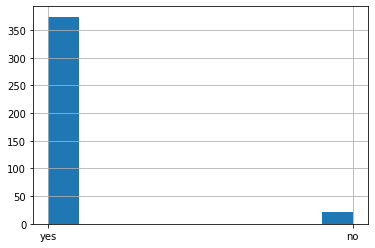

In [1546]:
sm.higher.hist()

2 уникальных значения, нулевые значения были заменены рандомно с соблюдением исходной пропорции
Явно преобладает количестов наблюдений о том, что студенты собираются получать высшее образование
Для проверки влияния признака на итоговые оценки, нужно проверить корреляцию - для этого переведем значения к бинарным 1 и 0

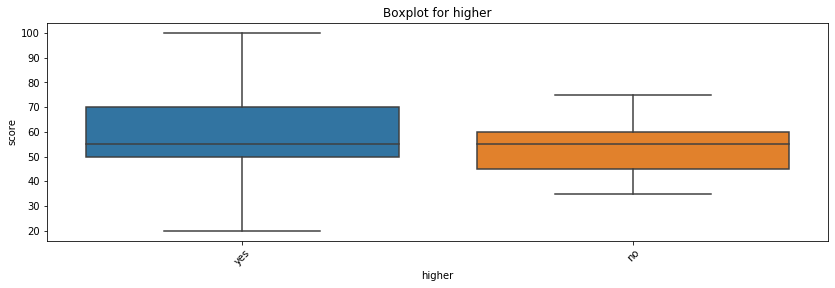

In [1547]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'higher')

In [1548]:
# попробуем проверить корреляцию, для этого перейдем к бинарной оценке признака
sm['higher_bin'] = sm.higher
bin_change(sm, 'higher_bin')
sm[['higher','higher_bin']].head(3)

Признак yes = 1, Признак no = 0


,higher,higher_bin
0,yes,1
1,yes,1
2,yes,1


In [1549]:
# проверим корреляцию признака и итоговых оценок
sm[['higher_bin', 'score']].corr()

,higher_bin,score
higher_bin,1.000000,0.063862
score,0.063862,1.000000


Корреляция - низкая. Решение по ипользованию признака будем принимать позже.

In [1550]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('higher')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('higher_bin')

# 22. поле: internet

In [1551]:
# internet — наличие интернета дома (yes или no)
pd.DataFrame(sm.internet).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
internet    361 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1552]:
sm.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

In [1553]:
sm.internet.unique()

array([nan, 'yes', 'no'], dtype=object)

In [1554]:
# очистим нулевые значения
clean_null_objects(sm, 'internet', 10)

,internet
yes,305
no,56


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
internet    361 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1555]:
# пропусков достаточно много - 34 (порядка 10%)
# так как у нас всего 2 категории, предлагается замена пропусков рандомно с учетом текущей пропорции категорий
var_list = ['yes', 'no']
quant_nulls = 34
prop_yes = 305/395
prop_dict = {
    'yes': int(round(quant_nulls * prop_yes,0)),
    'no': int(quant_nulls - int(round(quant_nulls * prop_yes,0)))
}

sm.internet = sm.internet.apply(lambda x: null_change_proportion(var_list, prop_dict) if pd.isnull(x) else x)
pd.DataFrame(sm.internet).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
internet    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1556]:
sm.internet.value_counts()

yes    331
no      64
Name: internet, dtype: int64

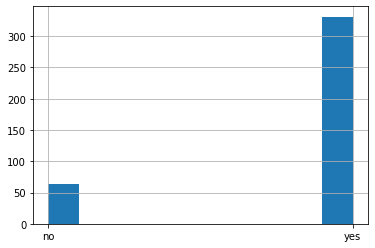

In [1557]:
sm.internet.hist()

2 уникальных значения, нулевые значения были заменены рандомно с соблюдением исходной пропорции
Явно преобладает количестов наблюдений о том, что дома у студентов есть интернет
Для проверки влияния признака на итоговые оценки, нужно проверить корреляцию - для этого переведем значения к бинарным 1 и 0

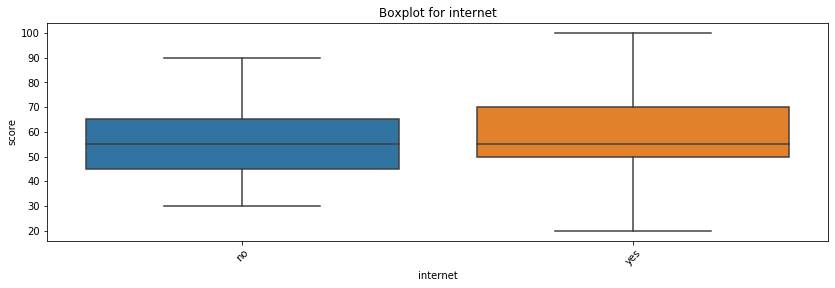

In [1558]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'internet')

In [1559]:
# попробуем проверить корреляцию, для этого перейдем к бинарной оценке признака
sm['internet_bin'] = sm.internet
bin_change(sm, 'internet_bin')
sm[['internet','internet_bin']].head(3)

Признак yes = 1, Признак no = 0


,internet,internet_bin
0,no,0
1,yes,1
2,yes,1


In [1560]:
# проверим корреляцию признака и итоговых оценок
sm[['internet_bin', 'score']].corr()

,internet_bin,score
internet_bin,1.000000,0.057119
score,0.057119,1.000000


Корреляция - низкая. Решение по ипользованию признака будем принимать позже.

In [1561]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('internet')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('internet_bin')

# 23. поле: romantic

In [1562]:
# romantic — в романтических отношениях (yes или no)
pd.DataFrame(sm.romantic).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
romantic    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1563]:
sm.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

In [1564]:
sm.romantic.unique()

array(['no', nan, 'yes'], dtype=object)

In [1565]:
# очистим нулевые значения
clean_null_objects(sm, 'romantic', 10)

,romantic
no,240
yes,124


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
romantic    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1566]:
# пропусков достаточно много - 31 (порядка 8%)
# так как у нас всего 2 категории, предлагается замена пропусков рандомно с учетом текущей пропорции категорий
var_list = ['yes', 'no']
quant_nulls = 31
prop_yes = 240/395
prop_dict = {
    'yes': int(round(quant_nulls * prop_yes,0)),
    'no': int(quant_nulls - int(round(quant_nulls * prop_yes,0)))
}

sm.romantic = sm.romantic.apply(lambda x: null_change_proportion(var_list, prop_dict) if pd.isnull(x) else x)
pd.DataFrame(sm.romantic).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
romantic    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [1567]:
sm.romantic.value_counts()

no     252
yes    143
Name: romantic, dtype: int64

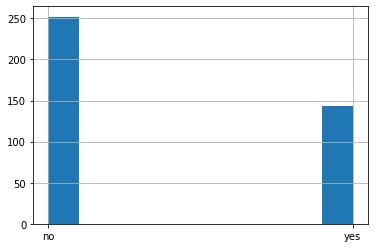

In [1568]:
sm.romantic.hist()

2 уникальных значения, нулевые значения были заменены рандомно с соблюдением исходной пропорции
Количестов наблюдений о том, что дома у студентов есть романтические отношения- выше примерно на половину.
Для проверки влияния признака на итоговые оценки, нужно проверить корреляцию - для этого переведем значения к бинарным 1 и 0

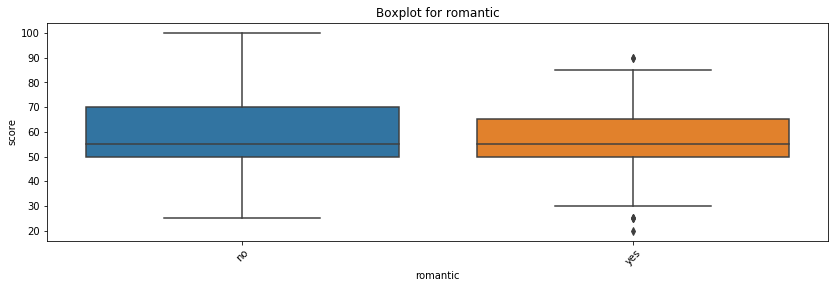

In [1569]:
#посмотрим, как признак соотносится с показателями по оценкам
draw_boxplot(sm, 'romantic')

In [1570]:
# попробуем проверить корреляцию, для этого перейдем к бинарной оценке признака
sm['romantic_bin'] = sm.romantic
bin_change(sm, 'romantic_bin')
sm[['romantic','romantic_bin']].head(3)

Признак no = 1, Признак yes = 0


,romantic,romantic_bin
0,no,1
1,no,1
2,yes,0


In [1571]:
# проверим корреляцию признака и итоговых оценок
sm[['romantic_bin', 'score']].corr()

,romantic_bin,score
romantic_bin,1.000000,0.055504
score,0.055504,1.000000


Корреляция - низкая. Решение по ипользованию признака будем принимать позже.

In [1572]:
# Для дальнейшего анализа
# добавим в список номинативных переменных
nom_list.append('romantic')
# введем список для вновь создаваемых столбцов с заменами на бинарные значения
nom_bin_list.append('romantic_bin')

# 24. поле: famrel

In [1573]:
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
pd.DataFrame(sm.famrel).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    368 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1574]:
sm.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

По распределению значений видно, что 1 наблюдение выглядит нелогично, так как оценка качества отношений лежит в пределах от 1 до 5. Проверим наличие выброса.

In [1575]:
outlier_borders(sm, 'famrel')

 25-й перцентиль: 4.0
 75-й перцентиль: 5.0
 IQR: 1.0
 Границы выбросов: [2.5, 6.5].


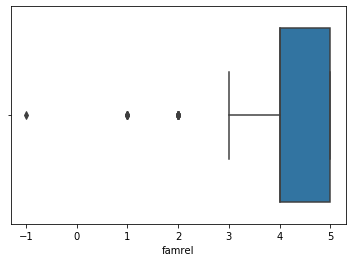

In [1576]:
sns.boxplot(sm.famrel)

у нас получилось, что нижняя граница выбросов - это 2,5, получается, что не только значение -1 не попадает в границы, но также и значения 1 и 2. Избавимся от выбросов

In [1577]:
sm.famrel = sm.famrel.apply(lambda x: None if x <2.5 else x)
sm.famrel.value_counts()

4.0    182
5.0     99
3.0     62
Name: famrel, dtype: int64

In [1578]:
sm.famrel.unique()

array([ 4.,  5.,  3., nan])

In [1579]:
# очистим нулевые значения
clean_null_objects(sm, 'famrel', 10)

,famrel
4.0,182
5.0,99
3.0,62


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    343 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1580]:
# пропусков достаточно много - 52 (порядка 13%)
# замена пропусков проведем заменой на медианное значение
sm.famrel = sm.famrel.apply(lambda x: sm.famrel.median() if pd.isnull(x) else x)
display(sm.famrel.value_counts())
pd.DataFrame(sm.famrel).info() 

4.0    234
5.0     99
3.0     62
Name: famrel, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


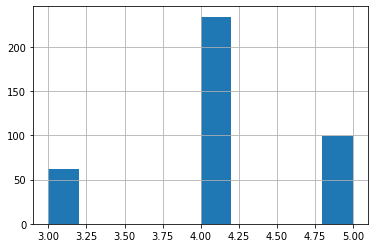

In [1581]:
sm.famrel.hist()

После обработки и удаления выбросов у нас осталось 3 уникальных значения (в том числе с учетом порогатв 10 наблюдений).
Выбросу удалены. Нулевые значения были заменены медианными значениями.
По распределению видим явно выделяется значение с оценкой - 4, а также оценка 5 выше, чем 3 - это свидетельствует в основном о хороших отношениях в семьях и неплохом домашнем психологическом климате.
Проверим наличие коррекляции признака на итоговые оценки

In [1582]:
# проверим корреляцию признака и итоговых оценок
sm[['famrel', 'score']].corr()

,famrel,score
famrel,1.000000,0.074467
score,0.074467,1.000000


Как видно по таблице коэффициентов корреляций, небольшая коррекляция есть. Решение по ипользованию признака будем принимать позже.

# 25. поле: freetime

In [1583]:
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
pd.DataFrame(sm.freetime).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    384 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1584]:
sm.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [1585]:
sm.freetime.unique()

array([ 3.,  2.,  4.,  1.,  5., nan])

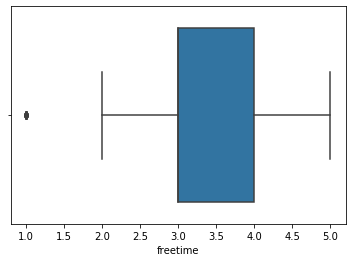

In [1586]:
# в целом по распределению, нет явных нелогичных наблюдений. однако проверим наличие выбросов
sns.boxplot(sm.freetime)

согласно графику, выброс есть. Ппосчитаем границы выбросов

In [1587]:
outlier_borders(sm, 'freetime')

 25-й перцентиль: 3.0
 75-й перцентиль: 4.0
 IQR: 1.0
 Границы выбросов: [1.5, 5.5].


In [1588]:
# получается, что наблюдения с признаком 1 являются выбросом и мы их уберем из анализа
sm.freetime = sm.freetime.apply(lambda x: None if x <1.5 else x)
sm.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
Name: freetime, dtype: int64

In [1589]:
# очистим нулевые значения
clean_null_objects(sm, 'freetime', 10)

,freetime
3.0,153
4.0,112
2.0,63
5.0,38


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    366 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1590]:
# пропусков достаточно много - 29 (порядка 7%)
# замена пропусков проведем заменой на медианное значение
sm.freetime = sm.freetime.apply(lambda x: sm.freetime.median() if pd.isnull(x) else x)
display(sm.freetime.value_counts())
pd.DataFrame(sm.freetime).info() 

3.0    182
4.0    112
2.0     63
5.0     38
Name: freetime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


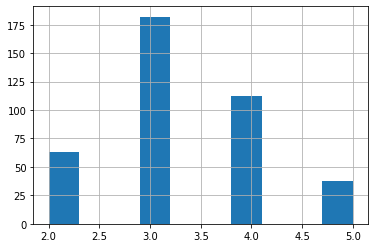

In [1591]:
sm.freetime.hist()

После преобразований у нас осалось 4 уникальных значения с не менее 10 наблюдениями в каждом.
Нулевые значения и выбросы заменены медианным значениями.
В итоге видно, что приобладает средняя оценка в 3 балла, далее идет группа 4, что говорит о том, что у студентов остается дотаточно свободного времени после школы на отдых и доп. занятия

In [1592]:
# проверим корреляцию признака и итоговых оценок
sm[['freetime', 'score']].corr()

,freetime,score
freetime,1.000000,-0.036274
score,-0.036274,1.000000


Из таблицы видно, что коррекляция очень низкая. Решение по ипользованию признака будем принимать позже.

# 26. поле: goout

In [1593]:
# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
pd.DataFrame(sm.goout).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    387 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1594]:
sm.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

In [1595]:
sm.goout.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

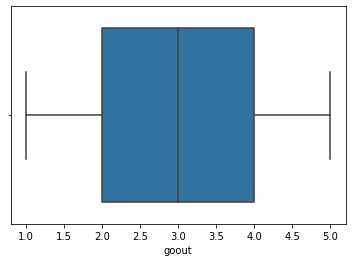

In [1596]:
# в целом по распределению, нет явных нелогичных наблюдений. однако проверим наличие выбросов
sns.boxplot(sm.goout)

Отлично, выбросов - нет.

In [1597]:
# очистим нулевые значения
clean_null_objects(sm, 'goout', 10)

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    387 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1598]:
# пропусков мало - 8 (порядка 2%)
sm.goout = sm.goout.apply(lambda x: sm.goout.median() if pd.isnull(x) else x)
display(sm.goout.value_counts())
pd.DataFrame(sm.goout).info() 

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


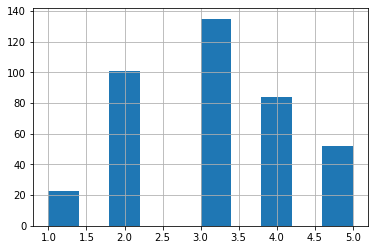

In [1599]:
sm.goout.hist()

По итогам преобразований осталось 5 уникальных значений, выбросов нет.
Нулевые значения заменены медианными
Распределение более менее нормальное с пиком в оценке - 3, что в купе с предыдущим показателем может свидетельствовать, что свободное время студенты часто проводят с друзьями.

In [1600]:
# проверим корреляцию признака и итоговых оценок
sm[['goout', 'score']].corr()

,goout,score
goout,1.000000,-0.168881
score,-0.168881,1.000000


по данным о корреляции видно, что коррекляция небольшая есть, причем она логично отрицательная - чем больше свободного времени проводят с друзьями, тем хуже готовятся к экзамены, и тем хуже оценки. Решение по ипользованию признака будем принимать позже.

# 27. поле: health

In [1601]:
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
pd.DataFrame(sm.health).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    380 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1602]:
sm.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

In [1603]:
sm.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

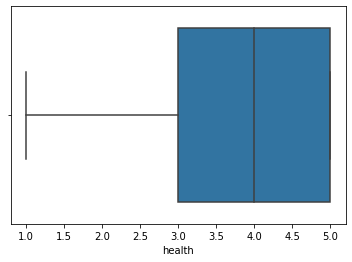

In [1604]:
# в целом по распределению, нет явных нелогичных наблюдений. однако проверим наличие выбросов
sns.boxplot(sm.health)

Выбросов нет

In [1605]:
# очистим нулевые значения
clean_null_objects(sm, 'health', 10)

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    380 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1606]:
# пропусков немного - 15 (порядка 4%)
sm.health = sm.health.apply(lambda x: sm.health.median() if pd.isnull(x) else x)
display(sm.health.value_counts())
pd.DataFrame(sm.health).info() 

5.0    138
3.0     89
4.0     78
1.0     47
2.0     43
Name: health, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


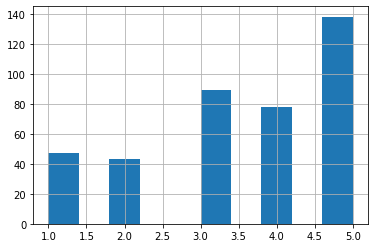

In [1607]:
sm.health.hist()

По итогам преобразований осталось 5 уникальных значений, выбросов нет.
Нулевые значения заменены медианными
По графику видно, что у основной части студентов нормальное и хорошее здоровье, однако есть и негативные  наблюдения 

In [1608]:
# проверим корреляцию признака и итоговых оценок
sm[['health', 'score']].corr()

,health,score
health,1.000000,-0.077042
score,-0.077042,1.000000


Корреляция достаточно низкая. Решение по ипользованию признака будем принимать позже.

# 28. поле: absences

In [1609]:
# absences — количество пропущенных занятий
pd.DataFrame(sm.absences).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    383 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1610]:
sm.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [1611]:
sm.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

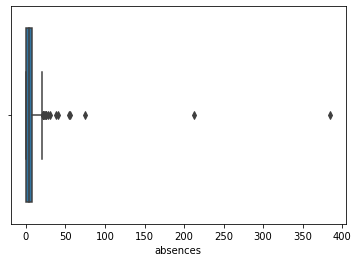

In [1612]:
# есть несколько странных, высоких значений - проверим наличие выбросов
sns.boxplot(sm.absences)

In [1613]:
outlier_borders(sm, 'absences')

 25-й перцентиль: 0.0
 75-й перцентиль: 8.0
 IQR: 8.0
 Границы выбросов: [-12.0, 20.0].


In [1614]:
#достаточно много значений попадают в выбросы, устраним их
sm.absences = sm.absences.apply(lambda x: None if x > 20 else x)
sm.absences.value_counts()

0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64

In [1615]:
# очистим нулевые значения
clean_null_objects(sm, 'absences', 10)

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    366 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1616]:
# пропусков получилось достаточно много - 29 (порядка 7%), заменим их медианными значениями
sm.absences = sm.absences.apply(lambda x: sm.absences.median() if pd.isnull(x) else x)
display(sm.absences.value_counts())
pd.DataFrame(sm.absences).info() 

0.0     111
4.0      82
2.0      60
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


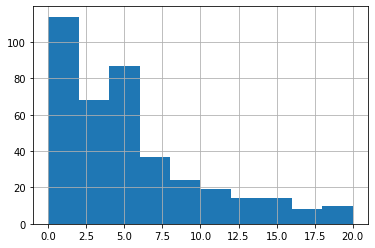

In [1617]:
sm.absences.hist()

По итогам преобразований осталось 21 уникальное значение, при этом свыше порогоа в 10 наблюдений таких значений юкдет всего 10. Выбросы устранены.
Нулевые значения заменены медианными
По графику видно, что большая часть студентов не пропускала больше 5 занятий

In [1618]:
# проверим корреляцию признака и итоговых оценок
sm[['absences', 'score']].corr()

,absences,score
absences,1.000000,-0.200057
score,-0.200057,1.000000


Корреляция данного признака с итоговыми оценками - невысокая. Решение по ипользованию признака будем принимать позже.

# 29. поле: studytime_granular

In [1619]:
# studytime_granular - еще одно, незаявленное поле, есть в данных
pd.DataFrame(sm.studytime_granular).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime_granular    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [1620]:
sm.studytime_granular.value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

посмотрим на признак studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [1621]:
sm.studytime.value_counts()

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

по распределению видно, что данные практически дублируют друг-друга

In [1622]:
# проверим корреляцию
sm[['studytime_granular', 'studytime']].corr()

,studytime_granular,studytime
studytime_granular,1.0,-1.0
studytime,-1.0,1.0


Данные о корреляции показывают полную взаимосвязь (хоть и со знаком -) двух признаков, поэтому признак studytime_granular исключим из дальнейшей обработки данных

In [1623]:
del_priznak(sm, 'studytime_granular')

'Удален столбец studytime_granular'

# Для принятия дальнейших шагов, рассмотрим номинативные признаки:

In [1624]:
# список номинативных признаков
nom_list

['school',
 'sex',
 'address',
 'famsize',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

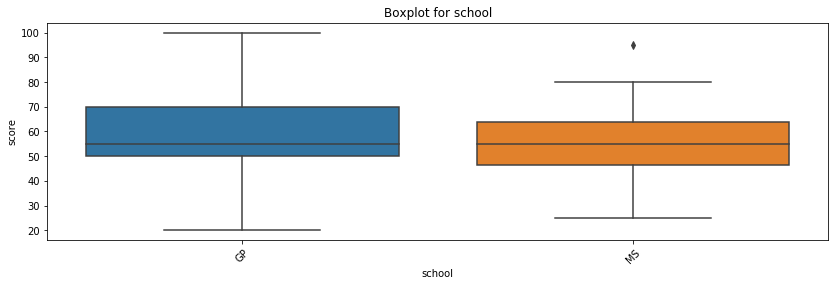

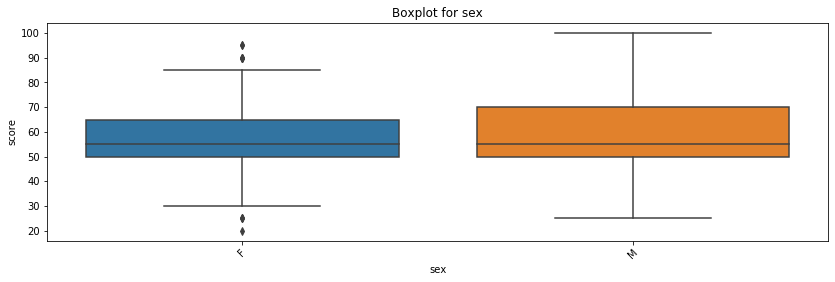

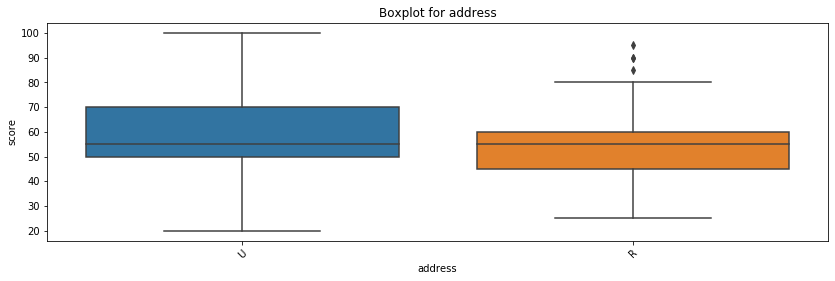

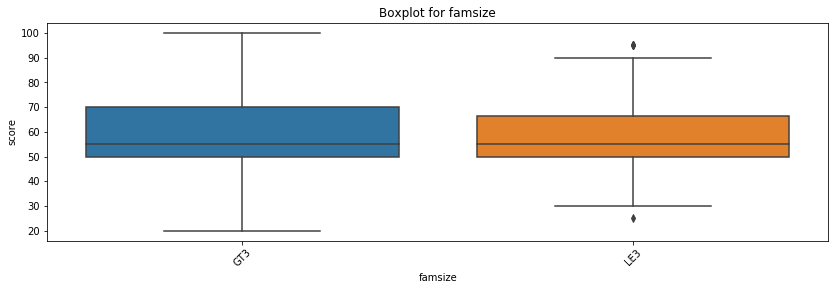

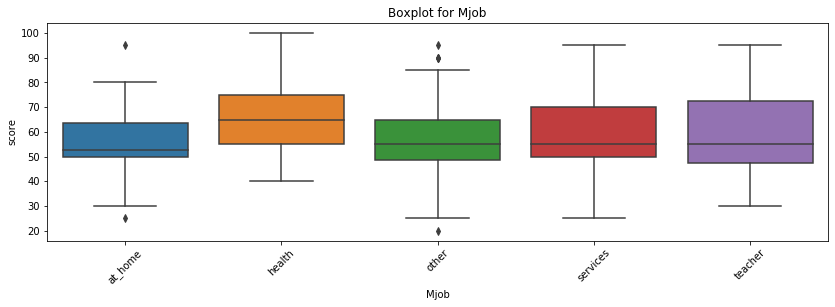

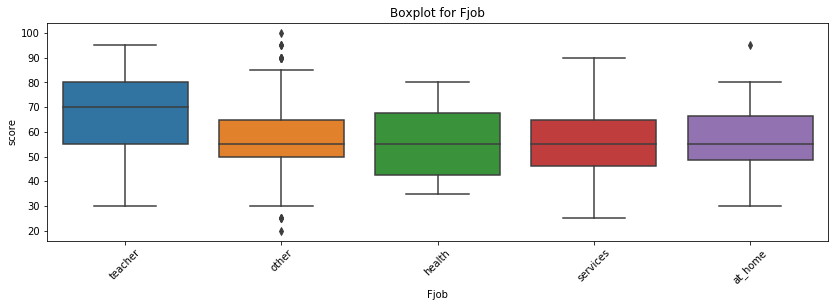

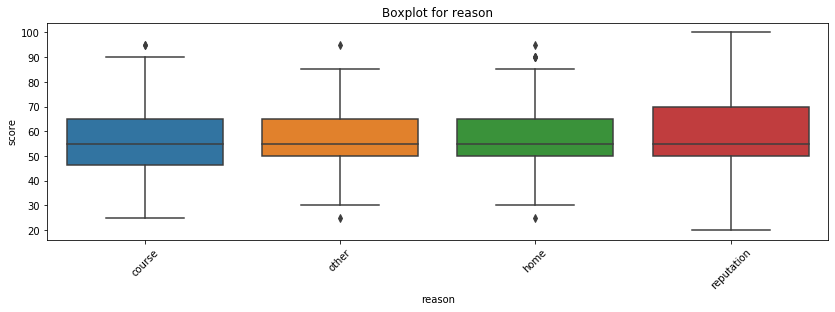

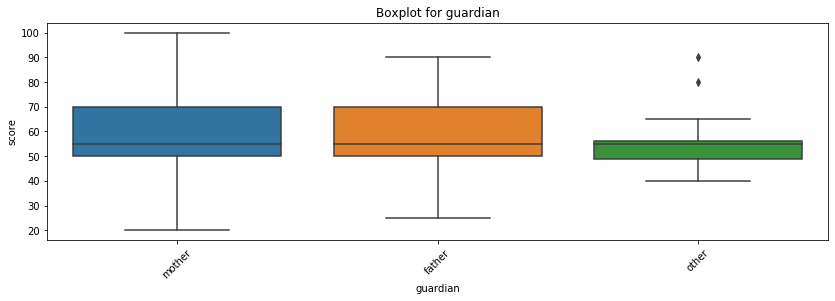

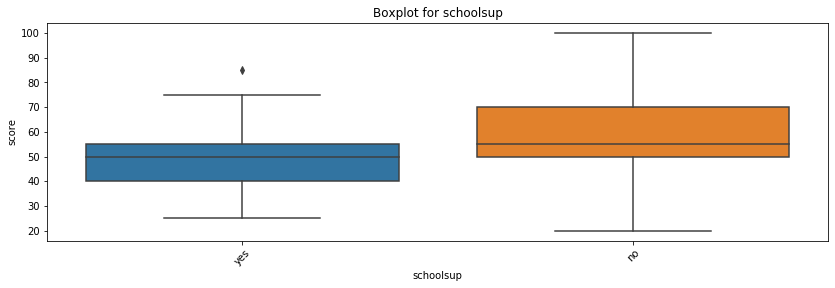

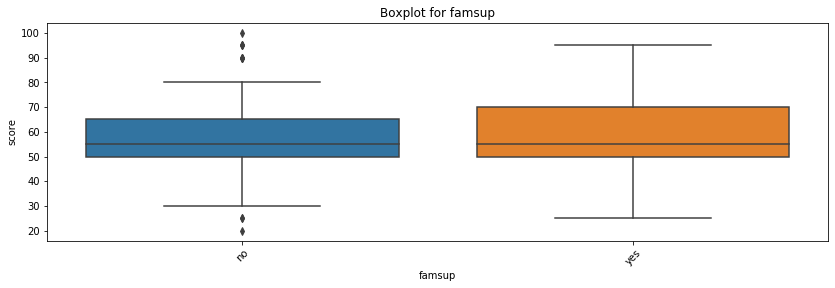

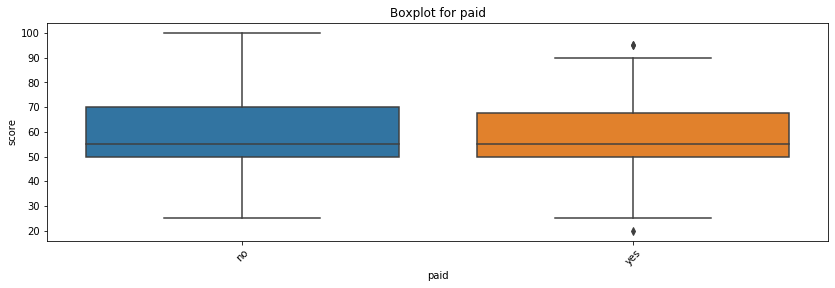

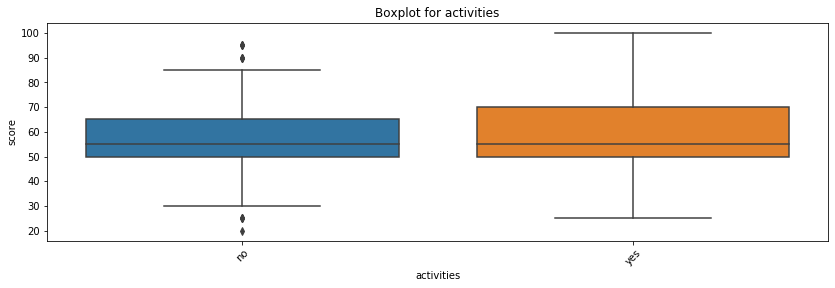

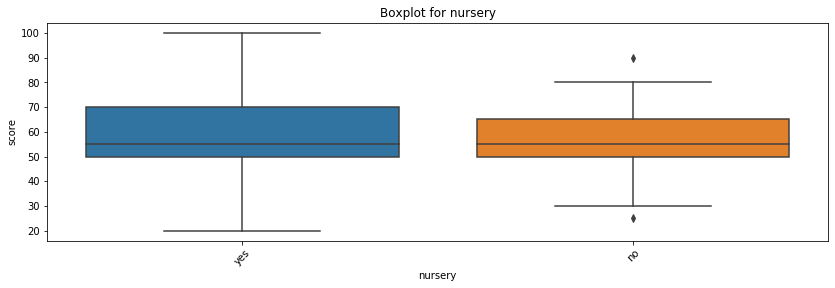

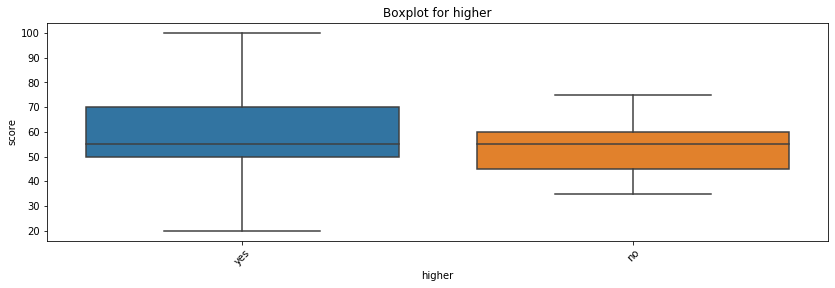

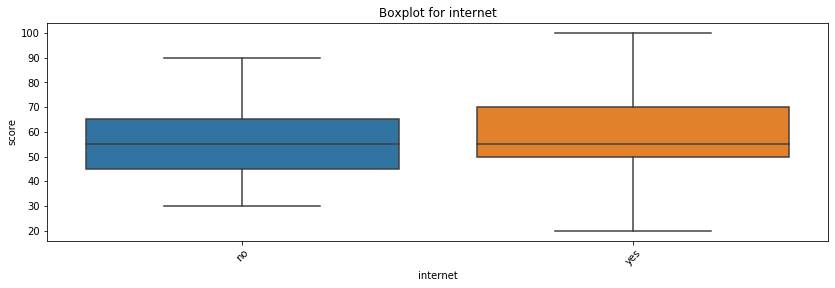

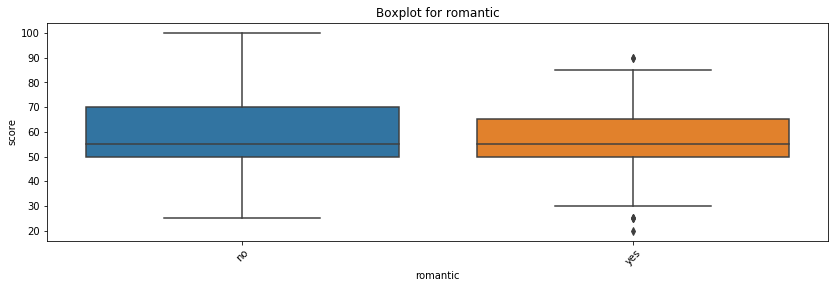

In [1625]:
# отрисуем еще раз все номинативные признаки
for nom in nom_list:
    draw_boxplot(sm, nom)

Для дальнейшего анализа проверим, есть ли статистическая разница в распределении итоговых оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения итоговых оценок студентов по различным параметрам неразличимы - названия признаков, по которым будут статистически значимые отличия, должны будут остаться для дальнейшего исследования, поэтому сразу запишем их в результирующий список

In [1626]:
result_ds_list=[]
for nom in nom_list:
    tmp = get_stat_dif (sm, nom)
    if tmp != []:
        result_ds_list.append(tmp)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup


In [1627]:
result_ds_list

['sex', 'address', 'Mjob', 'Fjob', 'schoolsup']

так как определены все номинативные признаки, которые мы будем использовать в дальнейшем, удалим временные столбцы, которые создавали (с указанием в названии "_bin")

In [1628]:
for nom_bin in nom_bin_list:
    del_priznak(sm, nom_bin)

In [1629]:
sm.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,presence,Parents_edu
0,GP,F,18,U,GT3,0.0,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,4.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4.0,3.0,6.0,30.0,1,2
1,GP,F,17,U,GT3,1.0,1.0,1.0,at_home,other,course,father,1.0,2.0,4.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,1,0
2,GP,F,15,U,LE3,1.0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,yes,4.0,3.0,2.0,3.0,10.0,50.0,1,0
3,GP,F,15,U,GT3,1.0,4.0,2.0,health,other,home,mother,1.0,3.0,4.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,1,1
4,GP,F,16,U,GT3,1.0,3.0,3.0,other,other,home,father,1.0,2.0,4.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,1,2


# Далее нужно рассмотреть корреляцию числовых столбцов:

In [1630]:
# построим матрицу корреляций
mtrx_corr = pd.DataFrame(sm.corr())
mtrx_corr

,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,presence,Parents_edu
age,1.000000,0.083339,-0.160777,-0.148776,0.084755,-0.015355,-0.264250,0.054231,0.032543,0.134069,-0.063892,0.141065,-0.129911,-0.090271,-0.111301
Pstatus,0.083339,1.000000,-0.129348,-0.115580,0.051054,-0.002783,-0.000778,-0.047755,0.039610,0.055405,-0.001619,-0.091469,-0.028387,-0.060579,-0.109195
Medu,-0.160777,-0.129348,1.000000,0.591836,-0.164282,0.073607,0.200893,0.050748,0.019092,0.062412,-0.053525,0.060908,0.175363,0.111594,0.813620
Fedu,-0.148776,-0.115580,0.591836,1.000000,-0.132151,0.002252,0.173712,0.004554,-0.036802,0.043961,0.004573,-0.027194,0.121710,0.055795,0.817520
traveltime,0.084755,0.051054,-0.164282,-0.132151,1.000000,-0.094637,-0.014147,-0.012311,-0.017297,0.051775,-0.044842,-0.036046,-0.069700,-0.011784,-0.144803
studytime,-0.015355,-0.002783,0.073607,0.002252,-0.094637,1.000000,0.118239,0.050956,-0.098792,-0.051090,-0.073674,-0.074658,0.132675,0.035495,0.039914
failures,-0.264250,-0.000778,0.200893,0.173712,-0.014147,0.118239,1.000000,0.023862,-0.107634,-0.068302,-0.118339,-0.141329,0.217299,0.199660,0.170756
famrel,0.054231,-0.047755,0.050748,0.004554,-0.012311,0.050956,0.023862,1.000000,0.109453,0.087790,0.025372,-0.020734,0.074467,0.006409,0.047461
freetime,0.032543,0.039610,0.019092,-0.036802,-0.017297,-0.098792,-0.107634,0.109453,1.000000,0.261007,0.057019,0.084551,-0.036274,0.037776,-0.021960
goout,0.134069,0.055405,0.062412,0.043961,0.051775,-0.051090,-0.068302,0.087790,0.261007,1.000000,-0.014274,0.103337,-0.168881,-0.017008,0.058820


In [1631]:
# подведем итоги по каждому полю
# age - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('age')

In [1632]:
# Pstatus - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('Pstatus')

In [1633]:
# Medu, Fedu  - имеют между собой довольно сильную корреляцию.
# Ранее был создан искуччтвенный признак об образовании Родителей (Parents_edu) -
# для дальнейшего анализа возьмем его
result_ds_list.append('Parents_edu')

In [1634]:
# traveltime - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('traveltime')

In [1635]:
# studytime - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('studytime')

In [1636]:
# failures - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('failures')

In [1637]:
# famrel - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('famrel')

In [1638]:
# freetime - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('freetime')

In [1639]:
# goout - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('goout')

In [1640]:
# health - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('health')

In [1641]:
# absences - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('absences')

In [1642]:
# presence - имеет слабую корреляцию со всеми остальными признаками, не исключаем, берем в дальнейшую обработку
result_ds_list.append('presence')

In [1643]:
# сам показатель итоговых оценок также берем для дальнейшего анализа
result_ds_list.append('score')

Итоговый список полей для дальнейшего анализа:

In [1644]:
result_ds_list

['sex',
 'address',
 'Mjob',
 'Fjob',
 'schoolsup',
 'age',
 'Pstatus',
 'Parents_edu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'presence',
 'score']

Итоговый датасет для анализа:

In [1645]:
result_ds = sm[result_ds_list]

In [1646]:
result_ds.head()

,sex,address,Mjob,Fjob,schoolsup,age,Pstatus,Parents_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,presence,score
0,F,U,at_home,teacher,yes,18,0.0,2,2.0,2.0,4.0,4.0,3.0,4.0,3.0,6.0,1,30.0
1,F,U,at_home,other,no,17,1.0,0,1.0,2.0,4.0,5.0,3.0,3.0,3.0,4.0,1,30.0
2,F,U,at_home,other,yes,15,1.0,0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,1,50.0
3,F,U,health,other,no,15,1.0,1,1.0,3.0,4.0,3.0,2.0,2.0,5.0,2.0,1,75.0
4,F,U,other,other,no,16,1.0,2,1.0,2.0,4.0,4.0,3.0,2.0,5.0,4.0,1,50.0
